## Predict the price of cars in the data scrapped

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
#Reading the Data
data=pd.read_csv('Used_cars.csv')
data=data.drop('Unnamed: 0',axis=1)
data

,Make_Year,Brand,Model,Transmission,Kms,Owner,Variant,City,Price
0,2019,Hyundai Verna,1.6 SX VTVT (O) Manual,Manual,"81,902 km",1st Owner,Petrol,New Delhi,"['₹9,81,699']"
1,2014,Mercedes Benz C Class,C 200 AVANTGARDE Automatic,Automatic,"37,531 km",1st Owner,Petrol,New Delhi,"['₹20,53,699']"
2,2020,KIA SELTOS,GTX + AT PETROL Automatic,Automatic,"8,241 km",1st Owner,Petrol,New Delhi,"['₹19,06,399']"
3,2013,Hyundai Grand i10,SPORTZ 1.2 KAPPA VTVT Manual,Manual,"10,558 km",1st Owner,Petrol,New Delhi,"['₹4,00,099']"
4,2020,KIA SELTOS,HTX 1.5 PETROL MT Manual,Manual,"32,799 km",1st Owner,Petrol,New Delhi,"['₹13,75,499']"
...,...,...,...,...,...,...,...,...,...
4244,2013,Honda Brio,1.2 V MT I VTEC Manual,Manual,"57,427 km",1st Owner,Petrol,Bengaluru,"['₹4,18,799']"
4245,2017,Honda City,VX CVT PETROL Automatic,Automatic,"57,854 km",1st Owner,Petrol,Bengaluru,"['₹9,54,799']"
4246,2014,Hyundai Verna,FLUIDIC 1.4 VTVT CX Manual,Manual,"74,519 km",1st Owner,Petrol,Bengaluru,"['₹5,67,899']"
4247,2015,Maruti Swift,VXI Glory edition Manual,Manual,"40,107 km",1st Owner,Petrol,Bengaluru,"['₹4,99,690']"


# EDA
## Understanding the Data

In [3]:
#Checking for null values 
data.isna().sum()

Make_Year       0
Brand           0
Model           0
Transmission    0
Kms             0
Owner           0
Variant         0
City            0
Price           0
dtype: int64

In [4]:
data.dtypes

Make_Year        int64
Brand           object
Model           object
Transmission    object
Kms             object
Owner           object
Variant         object
City            object
Price           object
dtype: object

## Data Cleaning

In [5]:
for i in range(len(data)):
    data['Kms'][i]=data['Kms'][i].replace("km", "").strip()
for i in range(len(data)):
    data['Kms'][i]=data['Kms'][i].replace(',', '')
# Convert single column to int dtype
data['Kms'] = pd.to_numeric(data['Kms'])
data.Owner.unique()

array(['1st Owner', '2nd Owner', '3rd Owner'], dtype=object)

In [6]:
for i in range(len(data)):
    data['Price'][i]=data['Price'][i].replace('[','').replace(']','').replace('₹','').replace(',','').replace("'",'')
data['Price']=pd.to_numeric(data['Price'])
data.City.unique()

array(['New Delhi', 'Mumbai', 'Gurgaon', 'Kolkata', 'Noida', 'Chennai',
       'Pune', 'Hyderabad', 'Bengaluru'], dtype=object)

# Univariate Analysis

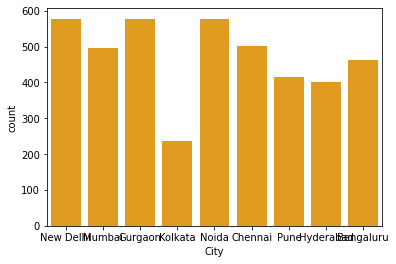

In [7]:
sns.countplot(data.City, color = 'Orange')

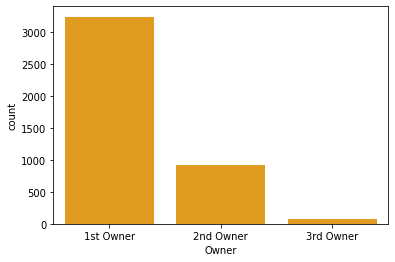

In [8]:
sns.countplot(data.Owner, color = 'Orange')


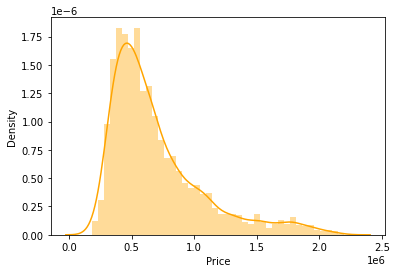

In [9]:
sns.distplot(data.Price, color = 'Orange')

In [10]:
for i in range(len(data)):
    a=data.Brand[i].split(" ")
    data.Model[i]=a[1::]
    data.Brand[i]=a[0]
for i in range(len(data)):
    if len(data.Model[i])==1:
        data.Model[i]=data.Model[i][0]
    if len(data.Model[i])==2:
        data.Model[i]=data.Model[i][0]+" "+data.Model[i][1]
    if len(data.Model[i])==3:
        data.Model[i]=data.Model[i][0]+" "+data.Model[i][1]+" "+data.Model[i][2]
data.Brand.unique()

array(['Hyundai', 'Mercedes', 'KIA', 'MG', 'Renault', 'Honda', 'Maruti',
       'Jaguar', 'Tata', 'Nissan', 'Jeep', 'Audi', 'Toyota', 'BMW',
       'Datsun', 'Mahindra', 'Skoda', 'Ford', 'Volkswagen', 'Fiat'],
      dtype=object)

In [12]:
data.Model.unique()

array(['Verna', 'Benz C Class', 'SELTOS', 'Grand i10', 'HECTOR PLUS',
       'Kiger', 'City', 'Baleno', 'X   F', 'WR-V', 'ALTROZ', 'MAGNITE',
       'i 1 0', 'Compass', 'A   4', 'Dzire', 'Micra', 'SONET',
       'NEW SANTRO', 'IGNIS', 'HECTOR', 'Kwid', 'i 2 0', 'PUNCH',
       'New Wagon-R', 'Swift', 'URBAN CRUISER', 'X   3', 'VENUE',
       'Redi Go', 'Swift Dzire', 'E o n', 'Vitara Brezza', 'Harrier',
       'Jazz', 'XUV 3OO', 'Ciaz', 'Ritz', 'Celerio', 'Etios Liva',
       'Amaze', 'Creta', 'YARIS', 'NEW I20', 'XUV500', 'Elite i20',
       'Rapid', 'TIGOR', 'Figo Aspire', 'S PRESSO', 'Alto', 'Thar',
       'S Cross', 'Alto K10', 'GRAND I10 NIOS', 'Corolla Altis', 'NEXON',
       'Tucson New', 'Glanza', 'Ecosport', 'Civic', 'Hexa', 'Alto 800',
       'Q   3', 'i20 Active', 'A   3', 'Brio', 'Duster', 'Scorpio',
       'Octavia', 'X   1', 'A   6', 'Ertiga', 'Benz E Class', 'Fortuner',
       '5 Series', 'Etios', 'Wagon R 1.0', 'Santro Xing', 'Safari',
       'X L 6', 'Innova', 'Tiago',

# Bi-variate Analysis

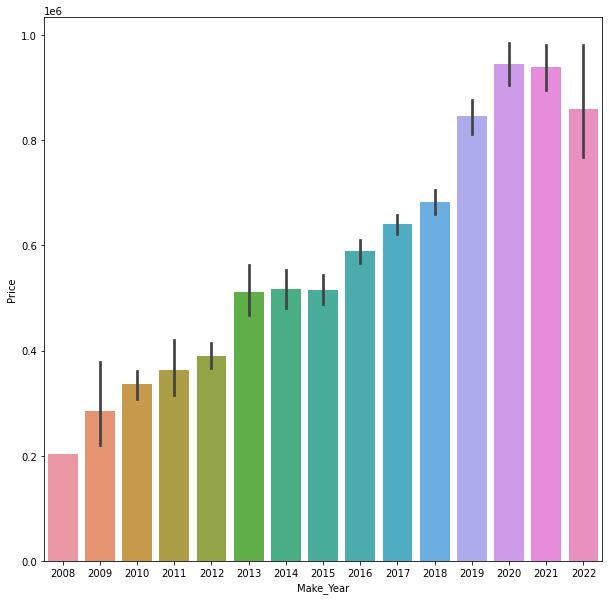

In [13]:
plt.figure(figsize=(10,10))
sns.barplot(x=data.Make_Year, y=data.Price)

Text(0.5, 1.0, 'Average Price v/s Brand')

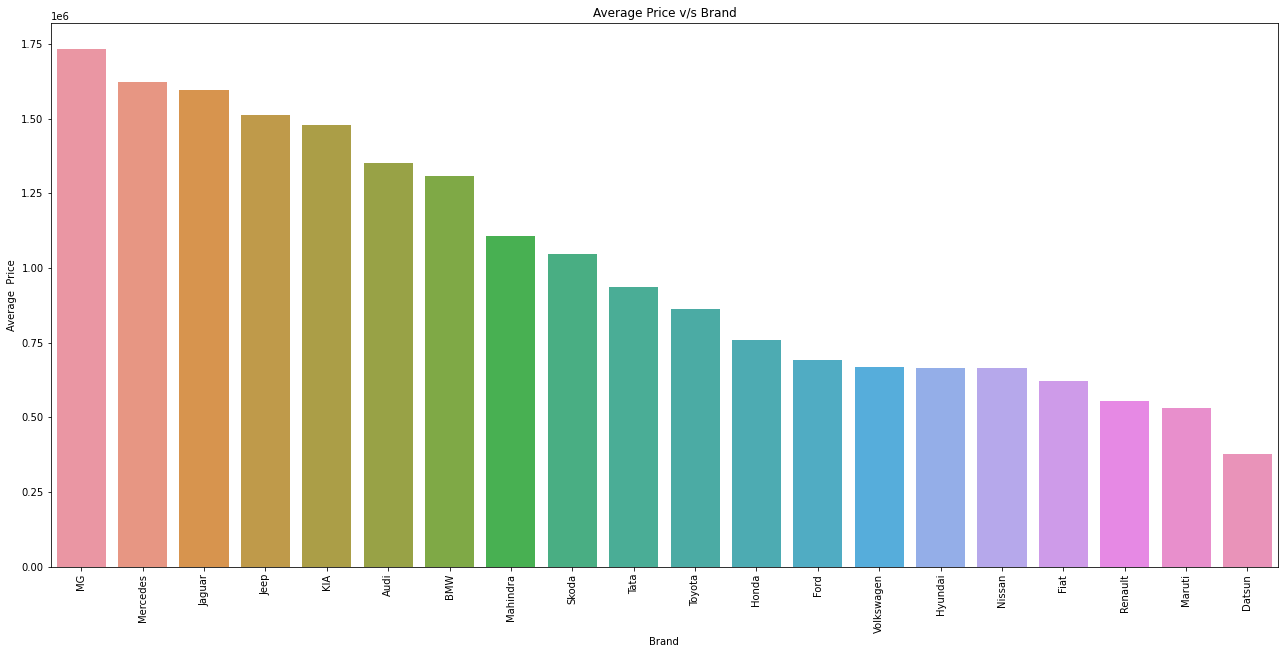

In [14]:
brand_Unique=list(data.Brand.unique())
averagePrice=[]

for i in brand_Unique:
    x=data[data.Brand==i]
    averagePrice.append(sum(x['Price'])/len(x))
df=pd.DataFrame({'brand_unique':brand_Unique,'Average_Price':averagePrice})

new_=df.Average_Price.sort_values(ascending=False).index.values
data_sort=df.reindex(new_)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=data_sort.brand_unique,y=data_sort.Average_Price)

plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Average  Price')
plt.title('Average Price v/s Brand')

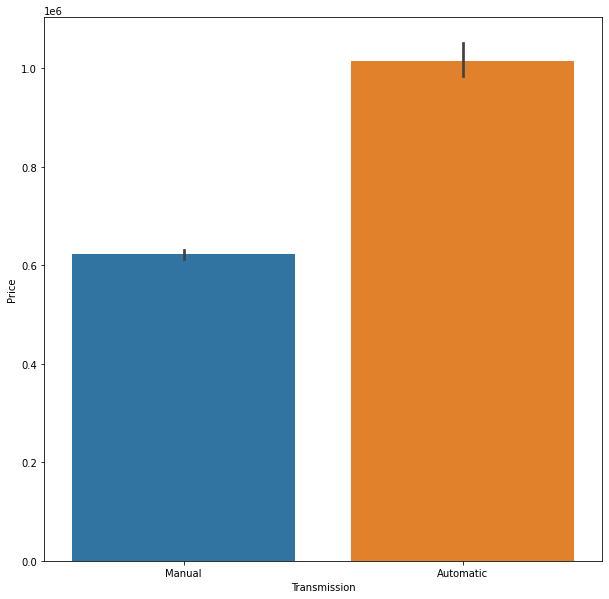

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(x=data.Transmission, y=data.Price)

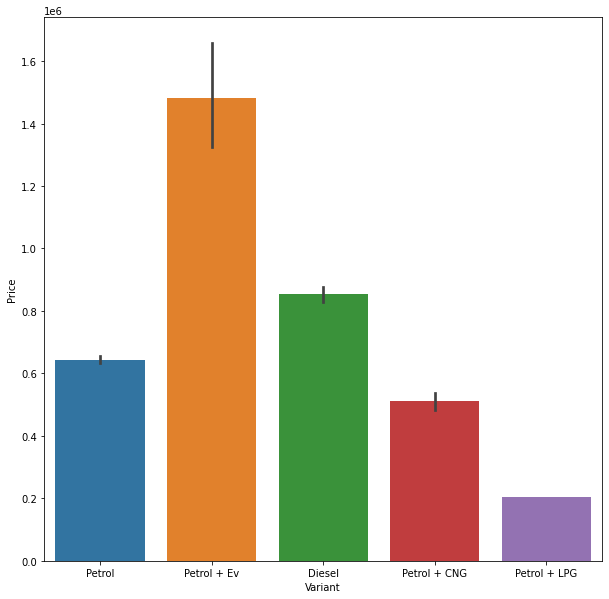

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(x=data.Variant, y=data.Price)

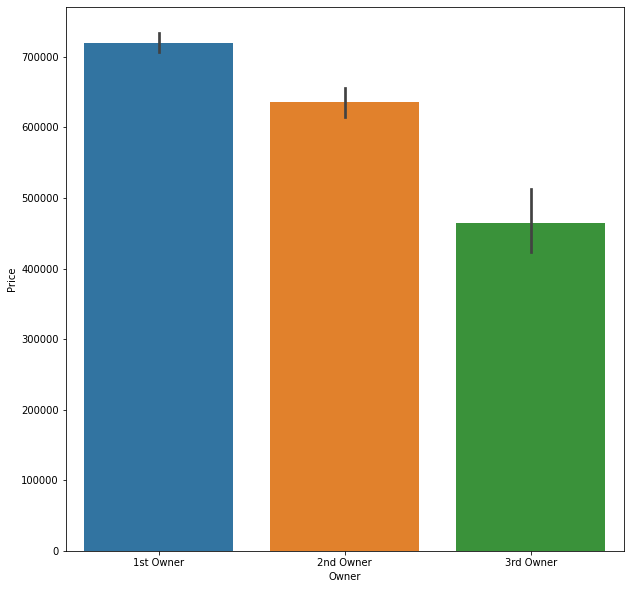

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(x=data.Owner, y=data.Price)

# Co-Relation Matrix

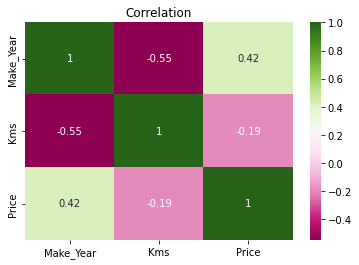

In [19]:
sns.heatmap(data.corr(),cmap="PiYG", annot = True)
plt.title('Correlation')
plt.show()

# Dummy Values

In [20]:
# Using Dummy variable can also use Label Encoding
data=pd.get_dummies(data,drop_first=True)
data.head(2)

,Make_Year,Kms,Price,Brand_BMW,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,...,Variant_Petrol + Ev,Variant_Petrol + LPG,City_Chennai,City_Gurgaon,City_Hyderabad,City_Kolkata,City_Mumbai,City_New Delhi,City_Noida,City_Pune
0,2019,81902,981699,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2014,37531,2053699,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Feature Engineering

In [21]:
data['Age of the vehicle']=2022-data['Make_Year']


In [22]:
# Removing Duplicates
data=data.drop_duplicates()
data.shape

(4066, 160)

In [23]:
# Splitting Dependent and Independent Variable
features = data.drop(["Price",'Make_Year'],axis=1)
target = data["Price"]

# Model Function

In [24]:
#Importing necessary libraries
from sklearn import datasets, linear_model, metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

def model_building(Features,target,model):
    Maximum_Accuracy=0

    test_size=[0.2,0.25,0.3]

    for j in test_size:
        for i in range(100):
            x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                          random_state=i)

        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)

        if acc>Maximum_Accuracy:
            Maximum_Accuracy=acc
            print("R-square",Maximum_Accuracy,"Train set R Squared",check_acc,'Random state',i,'test_size',j)

# LINEAR REGRESSION

In [25]:
model_building(features,target,LinearRegression())

R-square 0.9157525526615258 Train set R Squared 0.9363776519766812 Random state 99 test_size 0.2
R-square 0.919815321203032 Train set R Squared 0.9359120182316938 Random state 99 test_size 0.25
R-square 0.9215583642284857 Train set R Squared 0.9355560924564831 Random state 99 test_size 0.3


In [26]:
# creating empty list that will help us in the end to judge the best model
model_name=[]
mse=[]
mae=[]
R_sq=[]
rmse=[]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3,random_state=99)
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print(lr.score(x_train,y_train))
print('MSE:',mean_squared_error(lr_pred,y_test))
print('MAE:',mean_absolute_error(lr_pred,y_test))
print('r2_score:',r2_score(lr_pred,y_test))
print('RMSE Score',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))


0.9355560924564831
MSE: 10924100936.849373
MAE: 71078.72174161907
r2_score: 0.9147717024333353
RMSE Score 104518.42391104724


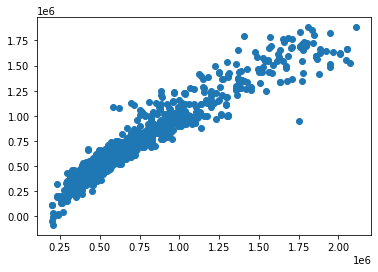

In [27]:
mse.append(mean_squared_error(lr_pred,y_test))
mae.append(mean_absolute_error(lr_pred,y_test))
R_sq.append(r2_score(lr_pred,y_test))
model_name.append("linear_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))
plt.scatter(x=y_test,y=lr_pred)

# RIDGE REGRESSION

In [28]:
model_building(features,target,Ridge())

R-square 0.9151321185068527 Train set R Squared 0.933394075415846 Random state 99 test_size 0.2
R-square 0.9186132566126627 Train set R Squared 0.9326773371636516 Random state 99 test_size 0.25
R-square 0.9191678060137127 Train set R Squared 0.9319796715776593 Random state 99 test_size 0.3


In [29]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3,random_state=99)
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'solver':['auto','svd','cholesky','lsqr']}
ridge=Ridge()
RR=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error')
RR.fit(x_train,y_train)
print(RR.best_params_)

{'alpha': 0.01, 'solver': 'auto'}


R2_score: 0.9215551639336185
mse: 10924546622.916637
mae: 71079.42864949627
rmse: 104520.55598262305


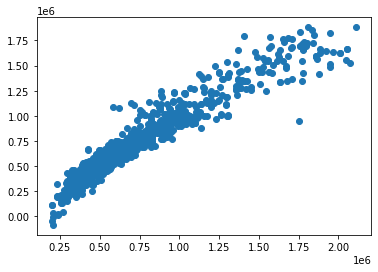

In [30]:
rr=Ridge(alpha=0.01,solver='auto')
rr.fit(x_train,y_train)
rr_pred=rr.predict(x_test)
print('R2_score:',r2_score(y_test,rr_pred))
print('mse:',metrics.mean_squared_error(y_test,rr_pred))
print('mae:',metrics.mean_absolute_error(y_test,rr_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,rr_pred)))
mse.append(mean_squared_error(rr_pred,y_test))
mae.append(mean_absolute_error(rr_pred,y_test))
R_sq.append(r2_score(y_test,rr_pred))
model_name.append("ridge_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,rr_pred)))
plt.scatter(x=y_test,y=rr_pred)


# Lasso Regression

In [31]:
model_building(features,target,Lasso())

R-square 0.9167356682574793 Train set R Squared 0.936376831629468 Random state 99 test_size 0.2
R-square 0.9206849070838276 Train set R Squared 0.935911232100368 Random state 99 test_size 0.25
R-square 0.9222543507998477 Train set R Squared 0.9355553224583336 Random state 99 test_size 0.3


In [32]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3,random_state=99)
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10]}
lasso=Lasso()
LS=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error')
LS.fit(x_train,y_train)
print(LS.best_params_)

{'alpha': 0.0001}


R2_score: 0.9225614557950262
mse: 10784406329.336212
mae: 70791.07176954356
rmse: 103847.99627020356


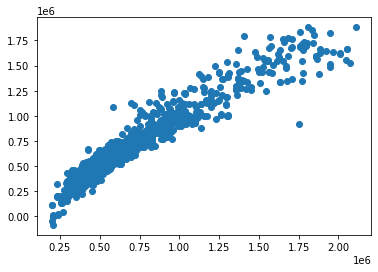

In [33]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls_pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,ls_pred))
print('mse:',metrics.mean_squared_error(y_test,ls_pred))
print('mae:',metrics.mean_absolute_error(y_test,ls_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,ls_pred)))

mse.append(mean_squared_error(ls_pred,y_test))
mae.append(mean_absolute_error(ls_pred,y_test))
R_sq.append(r2_score(y_test,ls_pred))
model_name.append("lasso_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,ls_pred)))
plt.scatter(x=y_test,y=ls_pred)


# Xgboost Regressor

In [34]:
model_building(features,target,XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42))

R-square 0.8546594681855754 Train set R Squared 0.849184367483313 Random state 99 test_size 0.2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=99)
xgb1 = XGBRegressor(verbosity = 0, random_state=42)
parameters ={
        'objective':['reg:linear'],
         'max_depth': [1,2,3,4,5,6,7,8,9,10],
         'colsample_bylevel':[0.2,0.5,0.6,1],
         'learning_rate':[0.01,0.1,0.3,0.2,1],
         'n_estimators':[100,150,200,500]
                    }

xgb_grid = GridSearchCV(xgb1,parameters,cv=3)

xgb_grid.fit(x_train, y_train)
print(xgb_grid.best_params_)

{'colsample_bylevel': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500, 'objective': 'reg:linear'}


R2_score: 0.9614776294156075
mse: 5251453598.163208
mae: 46455.2355267199
rmse: 72466.91381701865


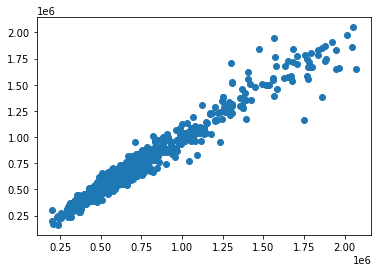

In [35]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=99)
Xg=XGBRegressor(objective ='reg:linear',verbosity= 0, random_state=42, colsample_bylevel=0.5,learning_rate=0.2,max_depth= 5,n_estimators=500)
Xg.fit(x_train,y_train)
Xg_pred=Xg.predict(x_test)
print('R2_score:',r2_score(y_test,Xg_pred))
print('mse:',metrics.mean_squared_error(y_test,Xg_pred))
print('mae:',metrics.mean_absolute_error(y_test,Xg_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,Xg_pred)))

mse.append(mean_squared_error(Xg_pred,y_test))
mae.append(mean_absolute_error(Xg_pred,y_test))
R_sq.append(r2_score(y_test,Xg_pred))
model_name.append("XGboost_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,Xg_pred)))
plt.scatter(x=y_test,y=Xg_pred)

# RANDOM FOREST

In [36]:
model_building(features,target,RandomForestRegressor())

R-square 0.9473802846215348 Train set R Squared 0.9913589183893387 Random state 99 test_size 0.2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=99)
model=RandomForestRegressor()
param_grid = { "n_estimators"   : [500,1000,1500],
              "min_samples_split" : [2,4,8],
             "bootstrap": [True, False]
            }
grid = GridSearchCV(model, param_grid, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'bootstrap': True, 'min_samples_split': 2, 'n_estimators': 1500}


R2_score: 0.948831887289948
mse: 6975348752.584059
mae: 50333.0012047502
rmse: 83518.55334345812


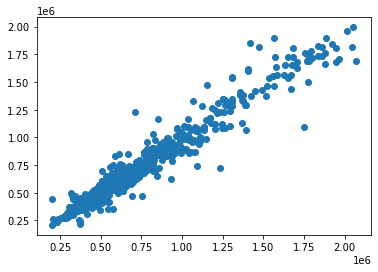

In [37]:
RF=RandomForestRegressor(n_estimators= 1500,bootstrap= True,min_samples_split=2,)
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
print('R2_score:',r2_score(y_test,RF_pred))
print('mse:',metrics.mean_squared_error(y_test,RF_pred))
print('mae:',metrics.mean_absolute_error(y_test,RF_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,RF_pred)))

mse.append(mean_squared_error(RF_pred,y_test))
mae.append(mean_absolute_error(RF_pred,y_test))
R_sq.append(r2_score(y_test,RF_pred))
model_name.append("Random_forest_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,RF_pred)))
plt.scatter(x=y_test,y=RF_pred)

In [38]:
# comparision
data = list(zip(model_name,mse,mae,rmse,R_sq))                                           
df = pd.DataFrame(data,columns=["Model","Mean_Sq_Error","Mean_Absolute_Error","Root Mean Squared Error",'R_sq'])                    #Creating DataFrame    
df

,Model,Mean_Sq_Error,Mean_Absolute_Error,Root Mean Squared Error,R_sq
0,linear_regression,1.092410e+10,71078.721742,104518.423911,0.914772
1,ridge_regression,1.092455e+10,71079.428649,104520.555983,0.921555
2,lasso_regression,1.078441e+10,70791.071770,103847.996270,0.922561
3,XGboost_regression,5.251454e+09,46455.235527,72466.913817,0.961478
4,Random_forest_regression,6.975349e+09,50333.001205,83518.553343,0.948832


# Pickle file of the model

In [39]:
import pickle

#saved the trained model in file with given name
pickle_out = open("car_price.pkl","wb") # name of my pickle file , wb -write
pickle.dump(Xg, pickle_out)
pickle_out.close()

# loading the pickeled model
pickle_in = open("car_price.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])


,0,1,2,3,4,5,6,7,8,9,...,804,805,806,807,808,809,810,811,812,813
Predicted,669872.4375,506371.28125,1842300.0,652445.8125,932009.9375,961207.75,491310.8125,830773.5,340082.5,1241262.25,...,625085.0,787337.5,669756.9375,372089.375,341087.75,1.035514e+06,882143.6875,629648.25,706671.875,415498.375
Original,542699.0000,428299.00000,1682799.0,509799.0000,978599.0000,1119599.00,463099.0000,786899.0,325299.0,1231599.00,...,663599.0,778299.0,725399.0000,330499.000,303299.00,1.148899e+06,892699.0000,602099.00,845799.000,497499.000


# Case study Completed
# The price can be predicted more accurately if the condition of the car was known